In [433]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [434]:
# This file contains the stock information of Microsoft from 04/01/2015 to 04/01/2021
money_df = pd.read_csv("Microsoft_Stock.csv")
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [435]:
money_df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


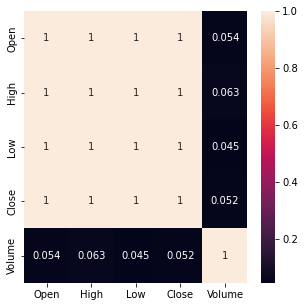

In [436]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(data=money_df.corr(),annot=True)

In [437]:
money_df.set_index("Date", drop=True, inplace=True)

In [438]:
money_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [439]:
money_df=money_df[['Close']]
type(money_df['Close']) == type(money_df[['Close']]) 

False

In [440]:
money_df.describe()

,Close
count,1511.000000
mean,107.422091
std,56.702299
min,40.290000
25%,57.855000
50%,93.860000
75%,138.965000
max,244.990000


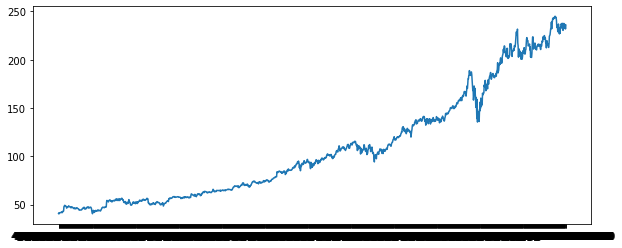

In [441]:
plt.figure(1, figsize=(10,4))
plt.plot(money_df.Close)

In [442]:
# because we want a stationary process
money_df['pct_change'] = money_df.Close.pct_change()
money_df.head()

,Close,pct_change
Date,,
4/1/2015 16:00:00,40.72,NaN
4/2/2015 16:00:00,40.29,-0.010560
4/6/2015 16:00:00,41.55,0.031273
4/7/2015 16:00:00,41.53,-0.000481
4/8/2015 16:00:00,41.42,-0.002649


In [443]:
# https://quantivity.wordpress.com/2011/02/21/why-log-returns/ -- explanation WHY
money_df['log_returns'] = np.log(1 + money_df['pct_change'])
money_df.head()

,Close,pct_change,log_returns
Date,,,
4/1/2015 16:00:00,40.72,NaN,NaN
4/2/2015 16:00:00,40.29,-0.010560,-0.010616
4/6/2015 16:00:00,41.55,0.031273,0.030794
4/7/2015 16:00:00,41.53,-0.000481,-0.000481
4/8/2015 16:00:00,41.42,-0.002649,-0.002652


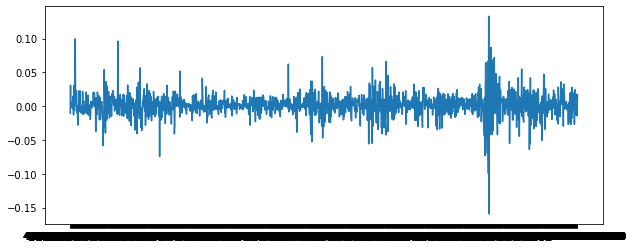

In [444]:
# Now we can see that the mean is always around zero, but there are outliers
plt.figure(1, figsize=(10,4)) 
plt.plot(money_df.log_returns)

In [445]:
money_df.dropna(inplace=True)
X = money_df[['Close', 'log_returns']].values
X

array([[ 4.02900000e+01, -1.06160730e-02],
       [ 4.15500000e+01,  3.07942221e-02],
       [ 4.15300000e+01, -4.81463659e-04],
       ...,
       [ 2.35240000e+02, -5.25736817e-03],
       [ 2.31850000e+02, -1.45156588e-02],
       [ 2.35770000e+02,  1.67661427e-02]])

In [446]:
money_df.head()

,Close,pct_change,log_returns
Date,,,
4/2/2015 16:00:00,40.29,-0.010560,-0.010616
4/6/2015 16:00:00,41.55,0.031273,0.030794
4/7/2015 16:00:00,41.53,-0.000481,-0.000481
4/8/2015 16:00:00,41.42,-0.002649,-0.002652
4/9/2015 16:00:00,41.48,0.001449,0.001448


In [447]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X) # Data normalization
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.50905029],
       [0.00615535, 0.65068092],
       [0.00605765, 0.54371247],
       ...,
       [0.95236932, 0.52737802],
       [0.9358085 , 0.49571301],
       [0.95495848, 0.60270237]])

In [448]:
Y = [x[0] for x in X_scaled]
Y[:5]

[0.0,
 0.006155349291646295,
 0.006057645334636069,
 0.005520273571079648,
 0.00581338544211038]

In [449]:
split = int(len(X_scaled)*0.6)
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
Y_train = Y[:split]
Y_test = Y[split : len(Y)]
split = int(len(X_test)*0.5)
X_val =  X_test[split : len(X_test)]
X_test = X_test[:split]
Y_val = Y_test[split : len(Y_test)] 
Y_test = Y_test[:split]

In [450]:
# LSTM of course
n_steps = 3
train_X = []
train_Y = []
test_X = []
test_Y = []
val_X = []
val_Y = []
for i in range(n_steps, len(X_train)):
  train_X.append(X_train[i-n_steps:i, :X_train.shape[1]])
  train_Y.append(Y_train[i])
for i in range(n_steps, len(X_test)):
  test_X.append(X_test[i-n_steps:i, :X_test.shape[1]])
  test_Y.append(Y_test[i])
for i in range(n_steps, len(X_val)):
  val_X.append(X_val[i-n_steps:i, :X_val.shape[1]])
  val_Y.append(Y_val[i])

In [451]:
money_df.head()

,Close,pct_change,log_returns
Date,,,
4/2/2015 16:00:00,40.29,-0.010560,-0.010616
4/6/2015 16:00:00,41.55,0.031273,0.030794
4/7/2015 16:00:00,41.53,-0.000481,-0.000481
4/8/2015 16:00:00,41.42,-0.002649,-0.002652
4/9/2015 16:00:00,41.48,0.001449,0.001448


In [452]:
train_X, train_Y = (np.array(train_X), np.array(train_Y))
train_X = np.reshape(train_X, train_X.shape)

test_X, test_Y = (np.array(test_X), np.array(test_Y))
test_X = np.reshape(test_X, test_X.shape)

val_X, val_Y = (np.array(val_X), np.array(val_Y))
val_X = np.reshape(val_X, val_X.shape)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(val_X.shape)
print(val_Y.shape)

(903, 3, 2)
(903,)
(299, 3, 2)
(299,)
(299, 3, 2)
(299,)


In [453]:
train_X[0]

array([[0.        , 0.50905029],
       [0.00615535, 0.65068092],
       [0.00605765, 0.54371247]])

In [454]:
train_Y[0]

0.005520273571079648

In [455]:
val = np.array(train_Y[0])
val = np.c_[val, np.zeros(val.shape)]

In [456]:
scaler.inverse_transform(val)

array([[41.42      , -0.15945339]])

In [473]:
from keras.models import Sequential
from keras import layers, regularizers
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(4, activation = 'selu', kernel_initializer = 'lecun_normal', 
               input_shape=(train_X.shape[1], train_X.shape[2]), input_dim = train_Y.shape[0]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_X, train_Y, epochs=100, validation_data = (val_X, val_Y), batch_size=20, verbose=1)

Epoch 1/100
46/46 [==============================] - 2s 11ms/step - loss: 0.1169 - val_loss: 1.1357
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.7432
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.6569
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.5853
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0117 - val_loss: 0.5178
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.4666
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.4174
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.3640
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.3238
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.2887
Epoch 11

In [ ]:
pred_train = model.predict(train_X)
pred_train = np.c_[pred_train, np.zeros(pred_train.shape)]
pred_test = model.predict(test_X)
pred_test = np.c_[pred_test, np.zeros(pred_test.shape)]
# invert predictions
pred_train = scaler.inverse_transform(pred_train)
pred_train = [pred[0] for pred in pred_train]
pred_test = scaler.inverse_transform(pred_test)
pred_test = [pred[0] for pred in pred_test]

print('pred_train: ', pred_train[:5])
print('pred_test:  ', pred_test[:5])

In [ ]:
pred_train = model.predict(train_X)
scores = model.evaluate(train_X, train_Y, verbose=0)
print('Accuracy on training data: ', scores)

pred_test = model.predict(test_X)
scores2 = model.evaluate(test_X, test_Y, verbose=0)
print('Accuracy on testing data: ', scores2)